# Hydrophobicity Profile

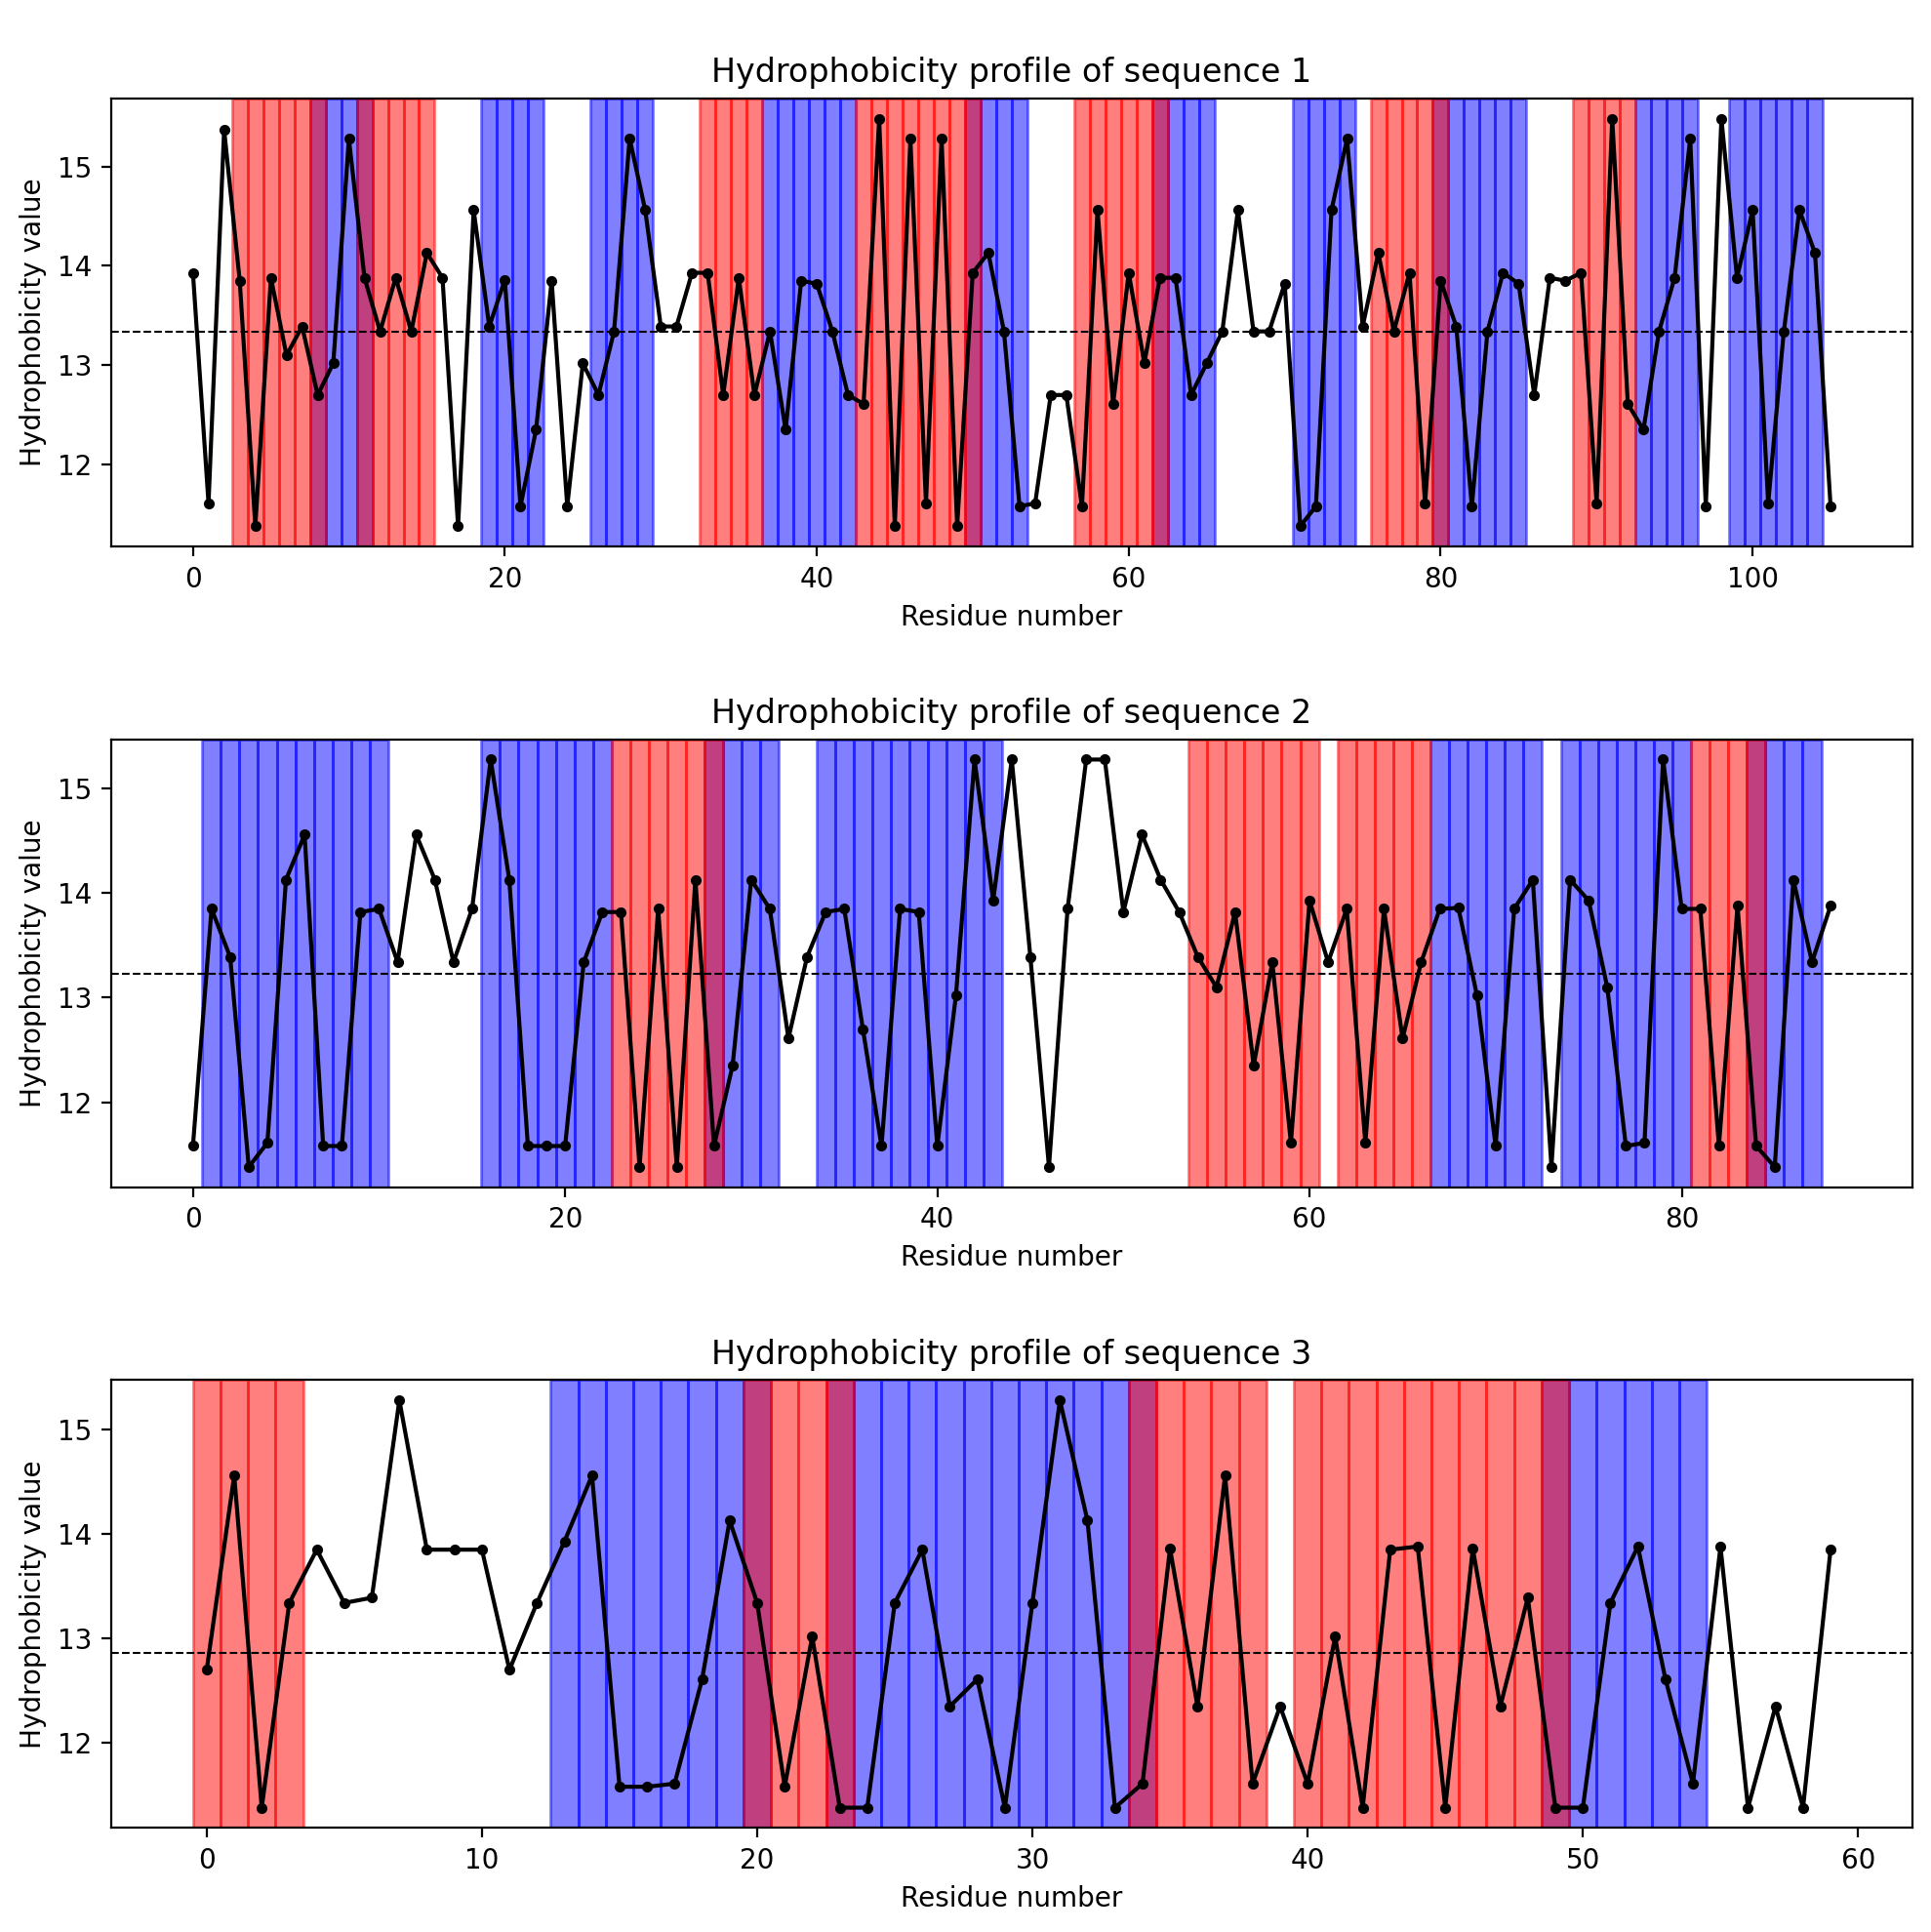

In [1]:
import matplotlib.pyplot as plt
import numpy as np


values = {
    'A': 13.85,
    'D': 11.61,
    'C': 15.37,
    'E': 11.38,
    'F': 13.93,
    'G': 13.34,
    'H': 13.82,
    'I': 15.28,
    'K': 11.58,
    'L': 14.13,
    'M': 13.86,
    'N': 13.02,
    'P': 12.35,
    'Q': 12.61,
    'R': 13.10,
    'S': 13.39,
    'T': 12.70,
    'V': 14.56,
    'W': 15.48,
    'Y': 13.88 }

f = open("q1.fasta",mode="r")
sequences = [seq.strip() for seq in f.readlines()[1::2]]
f.close()

fig,ax = plt.subplots(nrows=3,dpi=200,figsize=(10, 10))
count = 0
for sequence in sequences:
    
    hydrophobicity_profile = [values[residue] for residue in sequence]
    average = np.mean(hydrophobicity_profile)
    deviation = [0 if hydrophobicity < average else 1 for hydrophobicity in hydrophobicity_profile]
    helices = set()
    sheets = set()
    i = 0
    
    for i in range(len(sequence)-4+1):
        
        if deviation[i] == deviation[i+1] and deviation[i] != deviation[i+2] and deviation[i+2] == deviation[i+3]:
            helices.update({i,i+1,i+2,i+3})
        elif deviation[i] != deviation[i+1] and deviation[i] == deviation[i+2] and deviation[i] != deviation[i+3]:
            sheets.update({i,i+1,i+2,i+3})
    
    ax[count].plot(range(len(sequence)),hydrophobicity_profile,c="black",marker="o",markersize=3)
    ax[count].set_title(f"\nHydrophobicity profile of sequence {count+1}")
    ax[count].set_xlabel("Residue number")
    ax[count].set_ylabel("Hydrophobicity value")
    ax[count].axhline(average,c="black",ls="--",lw=0.75)
    
    for position in helices:
        ax[count].axvspan(position-0.5, position+0.5, alpha=0.5, color='blue')
    for position in sheets:
        ax[count].axvspan(position-0.5, position+0.5, alpha=0.5, color='red')
        
    count += 1
    
fig.tight_layout()
plt.show()

# Amphipathicity

In [2]:
import numpy as np


values = {
    'A': 13.85,
    'D': 11.61,
    'C': 15.37,
    'E': 11.38,
    'F': 13.93,
    'G': 13.34,
    'H': 13.82,
    'I': 15.28,
    'K': 11.58,
    'L': 14.13,
    'M': 13.86,
    'N': 13.02,
    'P': 12.35,
    'Q': 12.61,
    'R': 13.10,
    'S': 13.39,
    'T': 12.70,
    'V': 14.56,
    'W': 15.48,
    'Y': 13.88 }

f = open("Q1.fasta",mode="r")
sequences = [seq.strip() for seq in f.readlines()[1::2]]
f.close()

count = 1

for sequence in sequences:
    
    hydrophobicity_profile = [values[residue] for residue in sequence]
    average = np.mean(hydrophobicity_profile)
    deviation = [0 if hydrophobicity < average else 1 for hydrophobicity in hydrophobicity_profile]
    alphas = [i for i in range(len(sequence)-8+1) if ((deviation[i:i+8] == [0,0,1,1,0,0,1,1]) or (deviation[i:i+8] == [1,1,0,0,1,1,0,0]))]
    betas = [i for i in range(len(sequence)-6+1) if ((deviation[i:i+6] == [0,1,0,1,0,1]) or (deviation[i:i+6] == [1,0,1,0,1,0]))]
    
    alpha_amphipathicities = []
    
    for alpha_start in alphas:
        a1 = 0
        a2 = 0
        a3 = 0
        a4 = 0
        for j in range(0,8,4):
            a1 += values[sequence[alpha_start+j]]
            a2 += values[sequence[alpha_start+1+j]]
            a3 += values[sequence[alpha_start+2+j]]
            a4 += values[sequence[alpha_start+3+j]]
        a1 = a1/2
        a2 = a2/2
        a3 = a3/2
        a4 = a4/2
        if deviation[alpha_start] == deviation[alpha_start+1]:
            alpha_amphipathicities.append(abs((a1+a2)-(a3+a4)))
        else:
            alpha_amphipathicities.append(abs((a1+a4)-(a2+a3)))
    
    
    beta_amphipathicities = []
    
    for beta_start in betas:
        b1 = 0
        b2 = 0
        for j in range(0,6,2):
            b1 += values[sequence[beta_start+j]]
            b2 += values[sequence[beta_start+1+j]]
        b1 = b1/3
        b2 = b2/3
        if deviation[beta_start] == 0:
            beta_amphipathicities.append(b2-b1)
        else:
            beta_amphipathicities.append(b1-b2)
    
    print(f"Sequence {count}")
    if len(alphas) != 0:
        for i in range(len(alphas)):
            print(f"Helix of length 8 found at position {alphas[i]} with amphipathicity {round(alpha_amphipathicities[i],3)}")
    else:
        print("No helices of length 8 were found")

    if len(betas) != 0:
        for i in range(len(betas)):
            print(f"Sheet of length 6 found at position {betas[i]} with amphipathicity {round(beta_amphipathicities[i],3)}")
    else:
        print("No sheets of length 6 were found")
    print("")
    
    count += 1

Sequence 1
No helices of length 8 were found
Sheet of length 6 found at position 3 with amphipathicity 1.313
Sheet of length 6 found at position 43 with amphipathicity 3.48
Sheet of length 6 found at position 44 with amphipathicity 3.89
Sheet of length 6 found at position 45 with amphipathicity 3.373
Sheet of length 6 found at position 57 with amphipathicity 1.72

Sequence 2
Helix of length 8 found at position 1 with amphipathicity 4.89
Helix of length 8 found at position 3 with amphipathicity 5.105
Helix of length 8 found at position 34 with amphipathicity 3.23
Helix of length 8 found at position 36 with amphipathicity 4.0
Sheet of length 6 found at position 23 with amphipathicity 2.487
Sheet of length 6 found at position 54 with amphipathicity 1.163
Sheet of length 6 found at position 55 with amphipathicity 1.343

Sequence 3
No helices of length 8 were found
Sheet of length 6 found at position 44 with amphipathicity 2.007



# Hydrophobicity Profile with Window

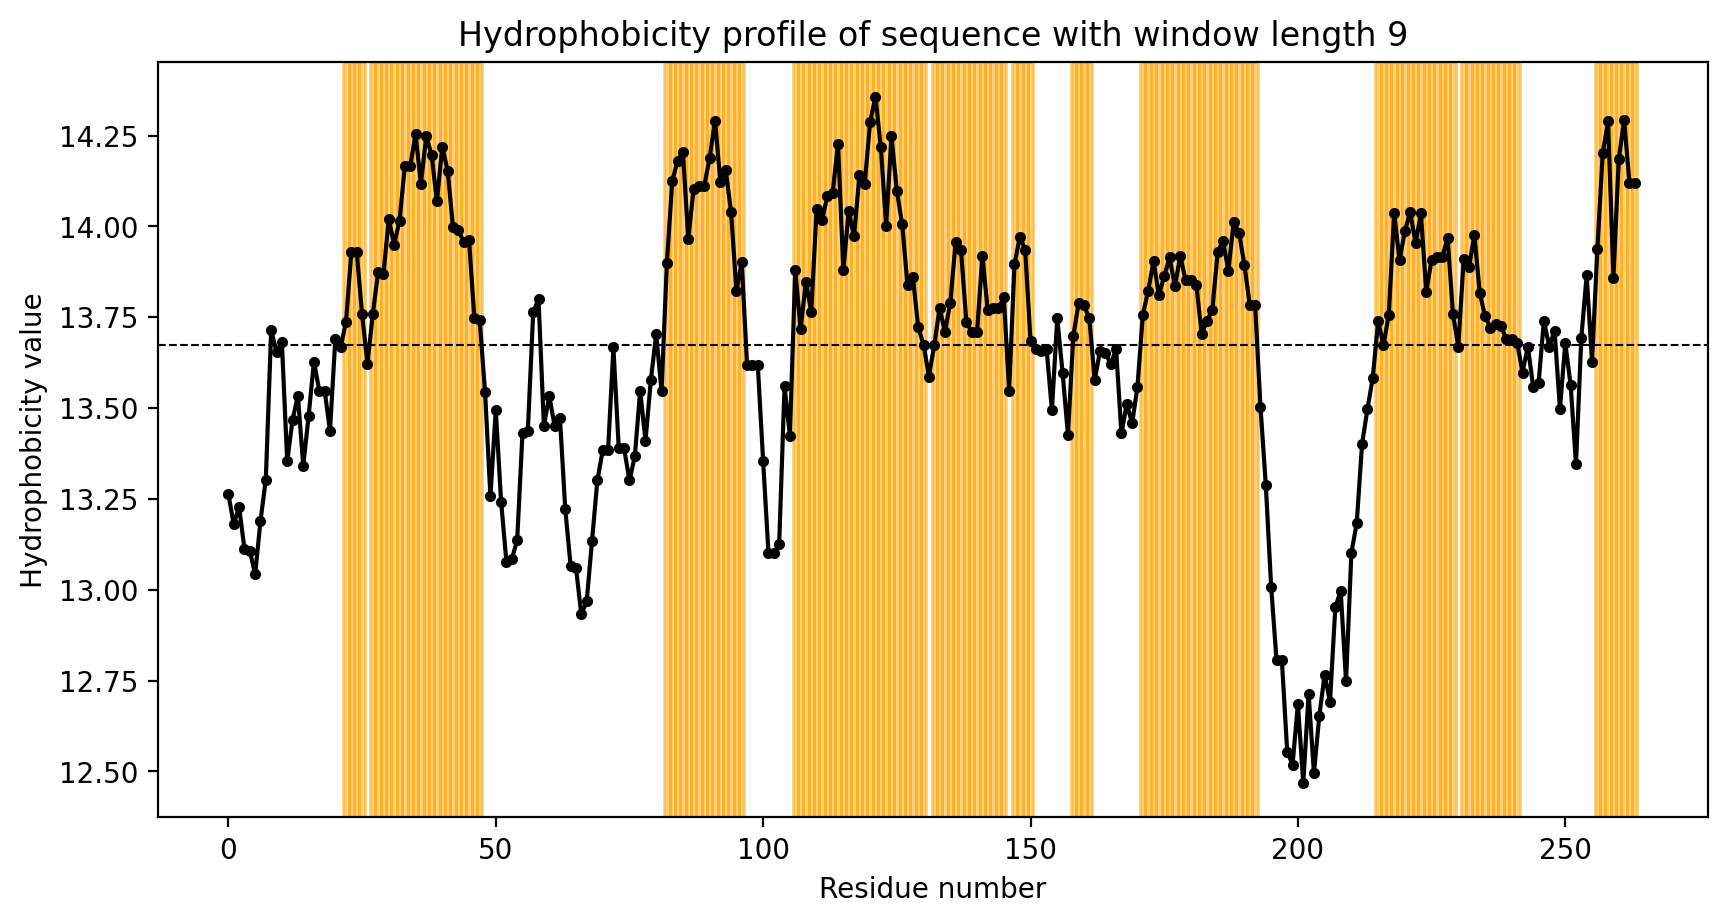

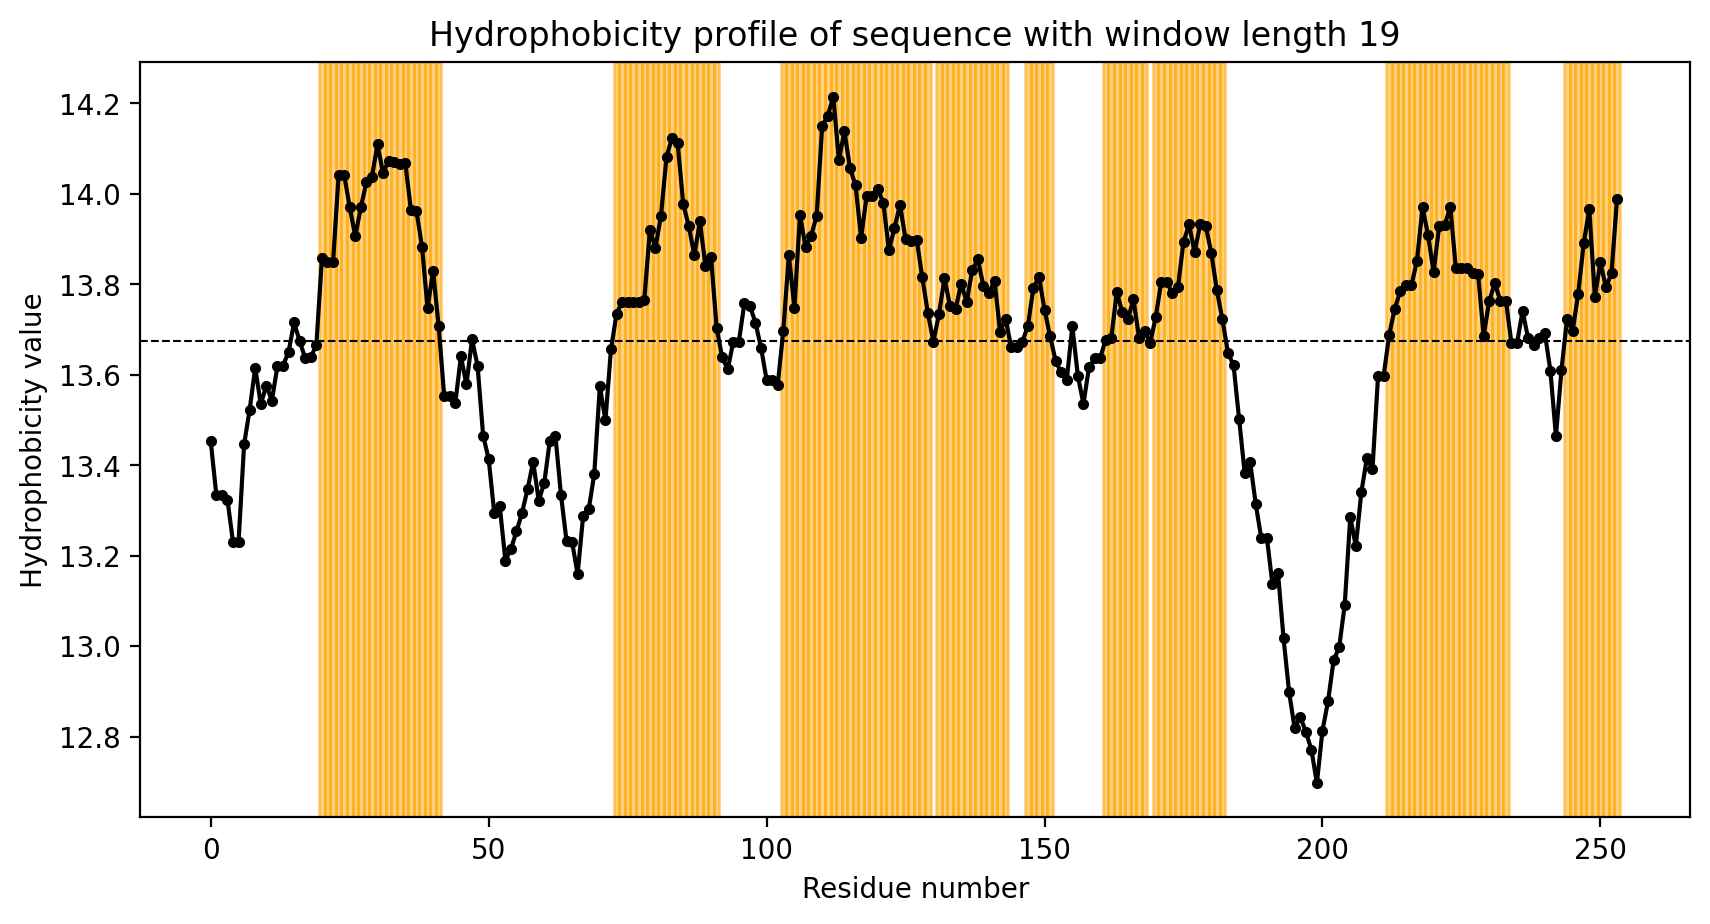

In [3]:
import matplotlib.pyplot as plt
import numpy as np


values = {
    'A': 13.85,
    'D': 11.61,
    'C': 15.37,
    'E': 11.38,
    'F': 13.93,
    'G': 13.34,
    'H': 13.82,
    'I': 15.28,
    'K': 11.58,
    'L': 14.13,
    'M': 13.86,
    'N': 13.02,
    'P': 12.35,
    'Q': 12.61,
    'R': 13.10,
    'S': 13.39,
    'T': 12.70,
    'V': 14.56,
    'W': 15.48,
    'Y': 13.88 }

f = open("Q2.fasta",mode="r")
sequences = [seq.strip() for seq in f.readlines()[1::2]]
f.close()

window_size1 = 9
half_width1 = window_size1 // 2
window_size2 = 19
half_width2 = window_size2 // 2

for sequence in sequences:
    
    hydrophobicity_profile = [np.mean([values[residue] for residue in sequence[i-half_width1:i+half_width1+1]]) for i in range(half_width1,len(sequence)-half_width1-1)]
    average = np.mean(hydrophobicity_profile)
    deviation = [0 if hydrophobicity < average else 1 for hydrophobicity in hydrophobicity_profile]
    transmembrane = set()
    i = 0
    
    for i in range(len(hydrophobicity_profile)-4+1):
        
        if deviation[i] == 1 and deviation[i] == deviation[i+1] and deviation[i+1] == deviation[i+2] and deviation[i+2] == deviation[i+3]:
            transmembrane.update({i,i+1,i+2,i+3})
    
    plt.figure(dpi=200,figsize=(10, 5))
    plt.plot(range(len(hydrophobicity_profile)),hydrophobicity_profile,c="black",marker="o",markersize=3)
    plt.title(f"Hydrophobicity profile of sequence with window length {window_size1}")
    plt.xlabel("Residue number")
    plt.ylabel("Hydrophobicity value")
    plt.axhline(average,c="black",ls="--",lw=0.75)
    
    for position in transmembrane:
        plt.axvspan(position-0.5, position+0.5, alpha=0.5, color='orange')
            
    plt.show()
    
    hydrophobicity_profile = [np.mean([values[residue] for residue in sequence[i-half_width2:i+half_width2+1]]) for i in range(half_width2,len(sequence)-half_width2-1)]
    average = np.mean(hydrophobicity_profile)
    deviation = [0 if hydrophobicity < average else 1 for hydrophobicity in hydrophobicity_profile]
    transmembrane = set()
    i = 0
    
    for i in range(len(hydrophobicity_profile)-4+1):
        
        if deviation[i] == 1 and deviation[i] == deviation[i+1] and deviation[i+1] == deviation[i+2] and deviation[i+2] == deviation[i+3]:
            transmembrane.update({i,i+1,i+2,i+3})
    
    plt.figure(dpi=200,figsize=(10, 5))
    plt.plot(range(len(hydrophobicity_profile)),hydrophobicity_profile,c="black",marker="o",markersize=3)
    plt.title(f"Hydrophobicity profile of sequence with window length {window_size2}")
    plt.xlabel("Residue number")
    plt.ylabel("Hydrophobicity value")
    plt.axhline(average,c="black",ls="--",lw=0.75)
    
    for position in transmembrane:
        plt.axvspan(position-0.5, position+0.5, alpha=0.5, color='orange')
            
    plt.show()

# Pattern Finding

In [4]:
f = open("Q4.fasta",mode="r")
content = f.readlines()
sequences = {content[i][1::].strip():content[i+1].strip() for i in range(0,len(content)-1,2)}
f.close()

for header,sequence in sequences.items():
    
    pattern1_length = 6
    pattern2_length = 14
    
    for i in range(len(sequence)-pattern1_length+1):
        sub_sequence = sequence[i:i+pattern1_length]
        if (sub_sequence[0] == "S" or sub_sequence[0] == "V") and (sub_sequence[1] == "T") and (sub_sequence[2] == "V" or sub_sequence[2] == "T") and (sub_sequence[3] == "D" or sub_sequence[3] == "E" or sub_sequence[3] == "R" or sub_sequence[3] == "K") and (sub_sequence[4] == "D" or sub_sequence[4] == "E" or sub_sequence[4] == "R" or sub_sequence[4] == "K") and (sub_sequence[5] != "I" and sub_sequence[5] != "L"):
            print(f"Match for Pattern 1 found in {header} at position {i+1}")     
    
    for i in range(len(sequence)-pattern2_length+1):
        sub_sequence = sequence[i:i+pattern2_length]
        if (sub_sequence[0] in ["F","I","L","V"]) and (sub_sequence[1] == "Q") and (sub_sequence[5] not in ["R","K"]) and (sub_sequence[6] == "G") and (sub_sequence[10] in ["R","K"]) and (sub_sequence[13] in ["F","I","L","V","W","Y"]):
            print(f"Match for Pattern 2 found in {header} at position {i+1}")

Match for Pattern 1 found in 4A0C_2|Chains C,E|CULLIN-4B|HOMO SAPIENS (9606) at position 665
Match for Pattern 1 found in 4A0K_1|Chain A|CULLIN-4A|HOMO SAPIENS (9606) at position 666
Match for Pattern 2 found in 4FXG_2|Chains B,E|Complement C4-A alpha chain|Homo sapiens (9606) at position 252
Match for Pattern 2 found in 4FXK_2|Chain B|Complement C4-A Alpha chain|Homo sapiens (9606) at position 252
Match for Pattern 2 found in 4XAM_2|Chains C,E|Complement C4-A|Homo sapiens (9606) at position 175
Match for Pattern 1 found in 5F0J_3|Chain C|Sorting nexin-3|Homo sapiens (9606) at position 70
Match for Pattern 1 found in 5F0L_3|Chain C|Sorting nexin-3|Homo sapiens (9606) at position 70
Match for Pattern 1 found in 5F0M_3|Chain C|Sorting nexin-3|Homo sapiens (9606) at position 70
Match for Pattern 1 found in 5F0P_3|Chain C|Sorting nexin-3|Homo sapiens (9606) at position 70
Match for Pattern 2 found in 5JPM_2|Chains B,E|Complement C4-A|Homo sapiens (9606) at position 252
Match for Pattern 2 